In [2]:
# !pip install numpy pandas scipy matplotlib seaborn 

<p style="align: center;"><img align=center src="https://mailfit.com/wp-content/uploads/2019/11/lego-5.png"  width=900></p>
<h1 style="text-align: center;"><b>«Практика построения доверительного интервала »</b></h3>


# Импортирование библиотек

In [3]:
import numpy as np  
import pandas as pd  # для работы с таблицами

from scipy import stats # При работе со статистикой

import matplotlib.pyplot as plt  # Библиотека для визуализации результатов 
import seaborn as sns # Более продвинутая библиотека для визуализации

<div class="alert alert-info">

Построим вспомогательную функцию для построения доверительного интервала 

In [4]:
#Вспомогательная функция для подсчета доверительного интервала
# https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data

#  Напомнить, про p-value
def mean_confidence_interval(data, confidence=0.95): #Сложный пример реализации. Проще смотри в лекци. 
    n = len(data)
    m, se = np.mean(data), stats.sem(data)
    delta = se * stats.t.ppf((1 + confidence)/2, n)  #  функция ppf из scipy возвращает нам перцентиль
    return m - delta, m + delta 

In [5]:
a =  [5,7,7,9,10,16,7,14,13,15,16,15,
     16,17,18,13,14,15,6,13, 14, 12 ,13 ]

print(mean_confidence_interval(a, 0.60))
print(mean_confidence_interval(a, 0.90))

(11.70778684018374, 13.074821855468436)
(11.02521592553596, 13.757392770116216)


In [6]:
# stats.sem?

In [7]:
### 

<h3 style="text-align: center;"><b>Выборы в президенты или зачем нам доверительные интерваллы?!</b></h3>

<p style="align: center;"><img align=center src="https://www.englisch-hilfen.de/images/usa/states/map.gif"  width=400></p>



<div class="alert alert-info">
<b>Задача: </b> Попробуем с помощью доверительного интервала оценить, какое минимальное количество штатов надо взять, чтобы определить будущего президента
</div>

In [8]:
US_elect_county = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/2012_US_elect_county.csv'
 
df = pd.read_csv(US_elect_county, sep=',',  on_bad_lines='skip') # Откроем датасет

In [9]:
df.dropna(how='any',inplace=True)  #Удалим пустые значения
df=df[df['%']!='#DIV/0!'][['State Postal','County Name','%']] #Удалим мусор из данных и оставим только нужное
df['%'] = df['%'].astype(float) # Приведем к численному значению результаты голосования
df.head()

,State Postal,County Name,%
0,AK,Alaska,41.6
1,AK,Alaska,41.6
2,AL,Alabama,38.4
3,AL,Autauga,26.6
4,AL,Baldwin,21.6


Среднее по всей выборке:  44.07946954813359


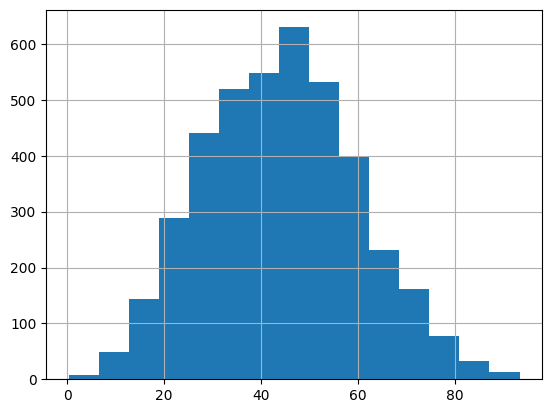

In [10]:
df['%'].hist(bins=15)
print('Среднее по всей выборке: ',df['%'].mean())

In [11]:
some_states_1 = ['AK','OH','WV','ME','CA','MD'] # Некоторая выборка штатов 
some_states_2 = ['WA','AK','DE']

sub_df = df.loc[df['State Postal'].isin(some_states_2)]  # Выборка по нескольким штатам

l, r =mean_confidence_interval(sub_df['%'], 0.99)
l, r

(42.02508490862674, 50.44448030876457)

In [12]:
df['State Postal'].value_counts()  # Раскомментить, если интересно соотношение штатов. 

State Postal
ME    498
MA    352
TX    255
VT    247
NH    238
VA    135
KY    121
MO    116
KS    106
IL    103
NC    101
IA    100
TN     96
NE     94
IN     93
OH     89
MN     88
MI     84
MS     83
OK     78
AR     75
WI     73
AL     68
PA     68
SD     67
LA     65
NY     63
CA     59
MT     57
WV     56
ND     54
ID     45
RI     40
WA     40
OR     37
NM     34
MD     25
NJ     22
NV     18
AZ     16
HI      5
DE      4
DC      2
AK      2
Name: count, dtype: int64

<p style="align: center;"><img align=center src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQM7ZUiNIwL4fZho5F7zqWpLBw-eL-Ttg0-UA&usqp=CAU"  width=400></p>
 

<div class="alert alert-info">
<b>Другой пример: </b>
    
Рассмотрим такой случай. Допустим, вы журналист и оказались в 2016 году в преддверии выборов президента в США. Вы хотите по результатам своих исследований достаточно точно определить, кто победит на этих выборах. Сколько вам необходимо опросить людей, чтобы назвать будущего президента с точность в 95%???
</div>

<div class="alert alert-info">
    
Результаты предшествующих исследований свидетельствуют, что стандартное отклонение генеральной совокупности приближенно равно 15. Пусть погрешность измерений $\Delta$ = 5. Таким образом, обозначим стандартное отклонение $\sigma$ = 15 и квантиль нормального распределения Z = 1,96.

</div>

$$ n = (\frac{Z*\sigma}{\Delta})^2$$
- $\Delta$ - допустимая ошибка/погрешность, 

- $\sigma$ - стандартное отклонение, 

- Z - квантиль нормального распределения


In [13]:
sigma = 15  # Стандартное отклонение
Z = 1.96  #  %   # Квантиль нормального распределения. 
Delta = 5 #%         #Погрешность

In [14]:
N = int(((sigma*Z)/Delta)**2)
N

34

In [15]:
len(df)

4072

# Проверим разумность наших расуждений:

Стандартное отклонение:  15.742396788859017
Среднее:  44.07946954813359


<Axes: >

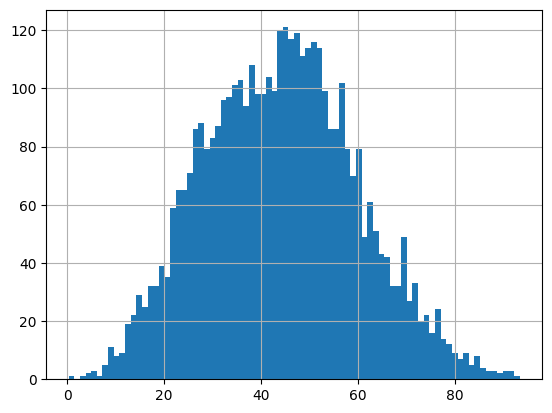

In [16]:
df = df['%']
print('Стандартное отклонение: ', df.std())
print('Среднее: ', df.mean())
df.hist(bins=80)

In [17]:
MEAN = df.sample(n = int(N)).mean()  # Возьмем выборку из случайных n значений

print('Среднее выборки: ', MEAN)
print('Среднее генеральной совокупности: ', df.mean())

print('Доверительный интервал: (', MEAN-Delta, ', ', MEAN+Delta, ')', sep='')

Среднее выборки:  43.785294117647055
Среднее генеральной совокупности:  44.07946954813359
Доверительный интервал: (38.785294117647055, 48.785294117647055)
